In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
import evaluation_metrics as em
from MM_Models import ModeMask
import MM_Plot_Utils as mmp
from MM_Traj_Utils import NewMaze, LoadTraj, LoadTrajFromPath, SplitModeClips, NewNodes4
import parameters as p
import utils as u

In [ ]:
ma = NewMaze(6)

In [4]:
import importlib
importlib.reload(u)
importlib.reload(em)
importlib.reload(mmp)
print()

In [5]:
with open(os.path.join(p.OUTDATA_PATH, 'levyagentsampledata.pkl'), 'rb') as f:
    stats = pickle.load(f)
agent_tf, agent_label = (u.convert_episodes_to_traj_class(stats["episodes_positions"]), 'Levy')

In [6]:
with open(os.path.join(p.OUTDATA_PATH, 'optimalsampledata.pkl'), 'rb') as f:
    stats = pickle.load(f)
dfs_agent_tf, dfs_agent_label = (u.convert_episodes_to_traj_class(stats["episodes_positions"]), 'Optimal')

In [7]:
rew_animal_data = u.RewardedAnimalData()
unrew_animal_data = u.UnrewardedAnimalData()

# Exploration Efficiency

/Users/us3519/mouse-maze/MouseMaze/src/evaluation_metrics.py:90: RuntimeWarning: divide by zero encountered in scalar divide
  _, c, n = NewNodes4(ns, nf[2] / len(ns))  # compute new nodes vs all nodes for exploration mode only
/Users/us3519/mouse-maze/MouseMaze/src/MM_Traj_Utils.py:1152: RuntimeWarning: divide by zero encountered in scalar floor_divide
  n=[np.average(np.array([len(set(ns[j:j+c1])) for j in range(0,lc-c1+1,(lc-c1)//(lc//c1)+1)])) for c1 in c]
/Users/us3519/mouse-maze/MouseMaze/src/MM_Traj_Utils.py:1154: RuntimeWarning: invalid value encountered in multiply
  w=c*fpn # scale the window widths to frames based on duration of the experiment


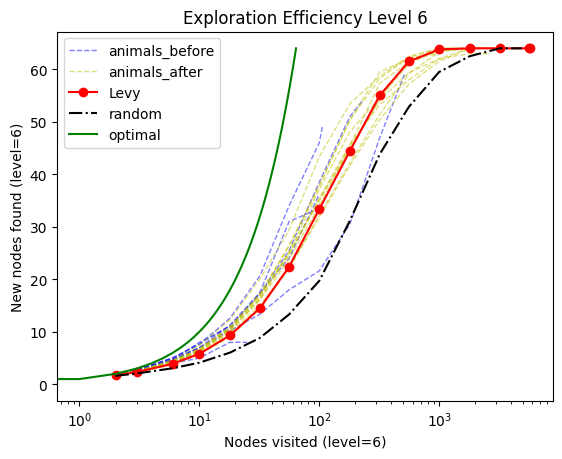

In [9]:
# rewarded animals - exploration before and after reward

re = True
le = 6

animal_tfs = animal_data.get_tf_before_first_reward()
c, n, _ = em.exploration_efficiency(animal_tfs[0], re=re, le=le)
plt.plot(c, n, color='b', linestyle='--', alpha=0.5, linewidth=1, label='animals_before')
for a_tf in animal_tfs[1:]:
    c, n, _ = em.exploration_efficiency(a_tf, re=re, le=le)
    plt.plot(c, n, color='b', linestyle='--', alpha=0.5, linewidth=1)

animal_tfs = animal_data.get_tf_all_after_first_reward()
c, n, _ = em.exploration_efficiency(animal_tfs[0], re=re, le=le)
plt.plot(c, n, color='y', linestyle='--', alpha=0.5, linewidth=1, label='animals_after')
for a_tf in animal_tfs[1:]:
    c, n, _ = em.exploration_efficiency(a_tf, re=re, le=le)
    plt.plot(c, n, color='y', linestyle='--', alpha=0.5, linewidth=1)

# agent
c, n, _ = em.exploration_efficiency(agent_tf, re=False, le=le)
plt.plot(c, n, f'ro-', label=agent_label)

# random
c, n = em.get_random_ee(le)
plt.plot(c, n, 'black', linestyle='-.', label='random')

# DFS
c, n = em.get_dfs_ee(le)
plt.plot(c, n, 'green', label='optimal')

plt.xscale('log', base=10)
plt.title(f'Exploration Efficiency Level {le}')
plt.xlabel(f"Nodes visited (level={le})")
plt.ylabel(f"New nodes found (level={le})")
plt.legend()
plt.show()

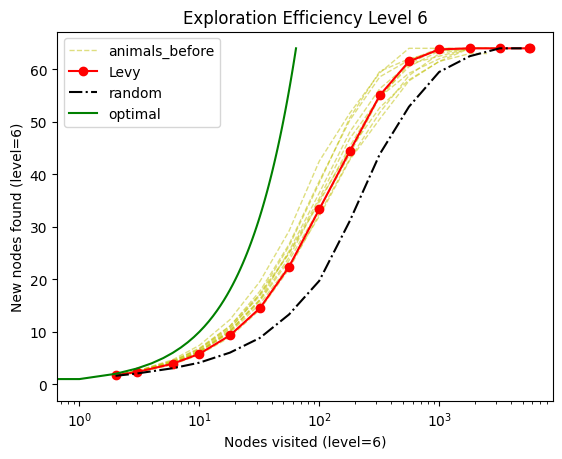

In [108]:
# rewarded animals - all exploration

animal_tfs = animal_data.get_data_all(re=True)
c, n, _ = em.exploration_efficiency(animal_tfs[0], re=re, le=le)
plt.plot(c, n, color='y', linestyle='--', alpha=0.5, linewidth=1, label='animals_before')
for a_tf in animal_tfs[1:]:
    c, n, _ = em.exploration_efficiency(a_tf, re=re, le=le)
    plt.plot(c, n, color='y', linestyle='--', alpha=0.5, linewidth=1)

# agent
c, n, _ = em.exploration_efficiency(agent_tf, re=False, le=le)
plt.plot(c, n, f'ro-', label=agent_label)

# random
c, n = em.get_random_ee(le)
plt.plot(c, n, 'black', linestyle='-.', label='random')

# DFS
c, n = em.get_dfs_ee(le)
plt.plot(c, n, 'green', label='optimal')

plt.xscale('log', base=10)
plt.title(f'Exploration Efficiency Level {le}')
plt.xlabel(f"Nodes visited (level={le})")
plt.ylabel(f"New nodes found (level={le})")
plt.legend()
plt.show()

In [15]:
import seaborn as sns

In [33]:
CM_TAB10 = sns.color_palette("tab10")
CM_TAB10

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

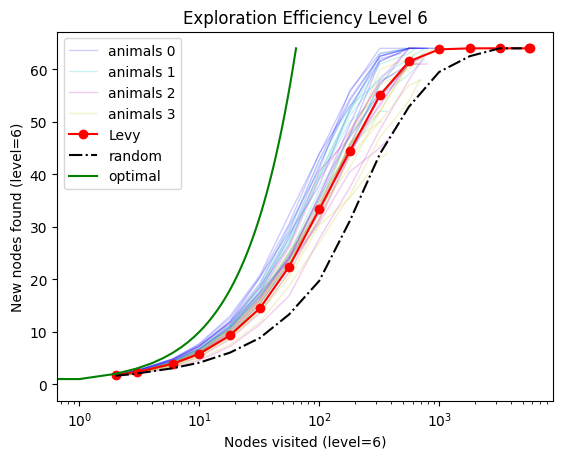

In [37]:
# unrewarded animals - exploration initial and later

le = 6

k = 4
animal_tfs = unrew_animal_data.get_data_split_k(k)

for i in range(k):
    phase_i_tfs = [sub[i] for sub in animal_tfs]
    c, n, _ = em.exploration_efficiency(phase_i_tfs[0], re=re, le=le)
    plt.plot(c, n, color=colors[i], linestyle='-', alpha=0.2, linewidth=1, label=f'animals {i}')
    for a_tf in phase_i_tfs[1:]:
        c, n, _ = em.exploration_efficiency(a_tf, re=re, le=le)
        plt.plot(c, n, color=colors[i], linestyle='-', alpha=0.2, linewidth=1)

# c, n, _ = em.exploration_efficiency(animal_tfs_later[0], re=re, le=le)
# plt.plot(c, n, color='y', linestyle='--', alpha=0.5, linewidth=1, label='animals_later')
# for a_tf in animal_tfs_later[1:]:
#     c, n, _ = em.exploration_efficiency(a_tf, re=re, le=le)
#     plt.plot(c, n, color='y', linestyle='--', alpha=0.5, linewidth=1)

# agent
c, n, _ = em.exploration_efficiency(agent_tf, re=False, le=le)
plt.plot(c, n, f'ro-', label=agent_label)

# random
c, n = em.get_random_ee(le)
plt.plot(c, n, 'black', linestyle='-.', label='random')

# DFS
c, n = em.get_dfs_ee(le)
plt.plot(c, n, 'green', label='optimal')

plt.xscale('log', base=10)
plt.title(f'Exploration Efficiency Level {le}')
plt.xlabel(f"Nodes visited (level={le})")
plt.ylabel(f"New nodes found (level={le})")
plt.legend()
plt.show()

# Decision Biases

Four biases during exploration only, mean and std dev across all nodes
     SF             SA             BF             BS
 0:  0.85 ±  0.20   0.70 ±  0.29   0.92 ±  0.14   0.53 ±  0.34
 1:  1.00 ±  0.00   0.60 ±  0.49  -1.00 ± -1.00  -1.00 ± -1.00
 2:  1.00 ±  0.00   0.60 ±  0.49   0.00 ±  0.00  -1.00 ± -1.00
 3:  0.94 ±  0.13   0.70 ±  0.35   0.93 ±  0.13   0.50 ±  0.33
 4:  1.00 ±  0.00   0.71 ±  0.43   0.98 ±  0.08   0.44 ±  0.35
 5:  0.98 ±  0.08   0.75 ±  0.40   0.94 ±  0.14   0.41 ±  0.44
 6:  0.89 ±  0.15   0.76 ±  0.27   0.90 ±  0.15   0.51 ±  0.32
 7:  0.96 ±  0.12   0.85 ±  0.29   0.96 ±  0.08   0.52 ±  0.40
 8:  0.94 ±  0.16   1.00 ±  0.00   0.93 ±  0.16   0.42 ±  0.45
 9:  0.94 ±  0.16   0.80 ±  0.31   0.94 ±  0.15   0.49 ±  0.39
mean [0.94913262 0.74762523 0.65081925 0.18076008]
Four biases during exploration only, mean and std dev across all nodes
     SF             SA             BF             BS
 0:  0.72 ±  0.23   0.78 ±  0.18   0.83 ±  0.17   0.67 ±  0.23
 1:  0.7

Text(0.5, 0.98, 'Decision biases')

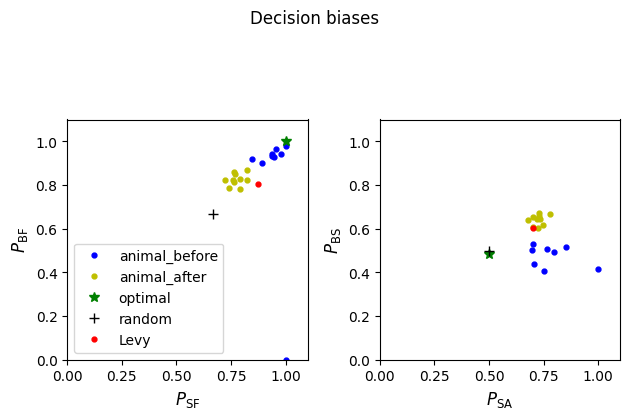

In [109]:
# rewarded animals - exploration before and after reward

plt.figure()

# animals before reward
animal_tfs = animal_data.get_tf_before_first_reward()
bi_data_before, _ = em.get_decision_biases(animal_tfs, re=False)
print("mean", np.mean(bi_data_before, axis=0))

# animals after reward
animal_tfs = animal_data.get_tf_all_after_first_reward()
bi_data_after, _ = em.get_decision_biases(animal_tfs, re=True)
print("mean", np.mean(bi_data_after, axis=0))

# dfs
bi_dfs, _ = em.get_decision_biases([dfs_agent_tf], re=True)
print("bi_dfs", bi_dfs)

# agent
bi_agents, _ = em.get_decision_biases([agent_tf], re=False)
print("bi_agents", bi_agents)

fmts = [f'b.', 'y.', 'g*', 'k+', 'r.'] # animal before, animal after, random, dfs, agent

# plot biases BF vs SF
ax = plt.subplot(121)
x = [bi_data_before[:, 0], bi_data_after[:, 0], [bi_dfs[0, 0]], [2 / 3]] + [[bi_agents[i, 0]] for i in range(len(bi_agents))]
y = [bi_data_before[:, 2], bi_data_after[:, 2], [bi_dfs[0, 2]], [2 / 3]]  + [[bi_agents[i, 2]] for i in range(len(bi_agents))]
plot(x, y, fmts=fmts, markersize=7,
     xlim=[0, 1.1], ylim=[0, 1.1], equal=True, axes=ax,
     legend=['animal_before', 'animal_after', 'optimal', 'random',  agent_label],
     xlabel='$P_{\mathrm{SF}}$', ylabel='$P_{\mathrm{BF}}$', loc='lower left')

# plot biases BS vs SA
ax = plt.subplot(122)
x = [bi_data_before[:, 1], bi_data_after[:, 1], [bi_dfs[0, 1]], [1 / 2]] + [[bi_agents[i, 1]] for i in range(len(bi_agents))]
y = [bi_data_before[:, 3], bi_data_after[:, 3], [bi_dfs[0, 3]], [1 / 2]] + [[bi_agents[i, 3]] for i in range(len(bi_agents))]
plot(x, y, fmts=fmts, markersize=7,
     xlim=[0, 1.1], ylim=[0, 1.1], equal=True, axes=ax,
     xlabel='$P_{\mathrm{SA}}$', ylabel='$P_{\mathrm{BS}}$', loc='lower left')

plt.suptitle(f"Decision biases")

Four biases during exploration only, mean and std dev across all nodes
     SF             SA             BF             BS
 0:  0.85 ±  0.20   0.70 ±  0.29   0.92 ±  0.14   0.53 ±  0.34
 1:  1.00 ±  0.00   0.60 ±  0.49  -1.00 ± -1.00  -1.00 ± -1.00
 2:  1.00 ±  0.00   0.60 ±  0.49   0.00 ±  0.00  -1.00 ± -1.00
 3:  0.94 ±  0.13   0.70 ±  0.35   0.93 ±  0.13   0.50 ±  0.33
 4:  1.00 ±  0.00   0.71 ±  0.43   0.98 ±  0.08   0.44 ±  0.35
 5:  0.98 ±  0.08   0.75 ±  0.40   0.94 ±  0.14   0.41 ±  0.44
 6:  0.89 ±  0.15   0.76 ±  0.27   0.90 ±  0.15   0.51 ±  0.32
 7:  0.96 ±  0.12   0.85 ±  0.29   0.96 ±  0.08   0.52 ±  0.40
 8:  0.94 ±  0.16   1.00 ±  0.00   0.93 ±  0.16   0.42 ±  0.45
 9:  0.94 ±  0.16   0.80 ±  0.31   0.94 ±  0.15   0.49 ±  0.39
mean [0.94913262 0.74762523 0.65081925 0.18076008]
Four biases during exploration only, mean and std dev across all nodes
     SF             SA             BF             BS
 0:  0.77 ±  0.27   0.75 ±  0.29   0.87 ±  0.20   0.65 ±  0.34
 1:  0.8

Text(0.5, 0.98, 'Decision biases')

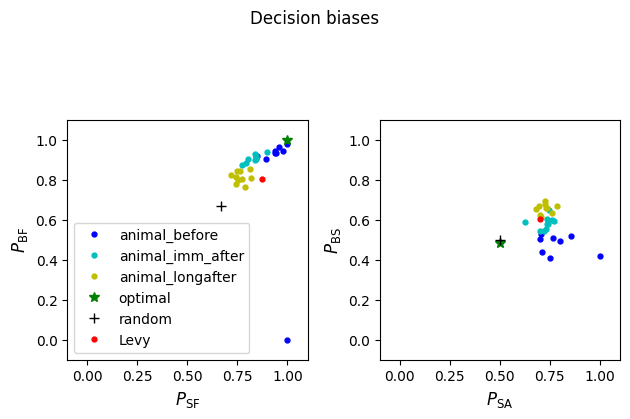

In [110]:
# rewarded animals - exploration before and imm after and long after reward

plt.figure()

# animals before reward
animal_tfs = animal_data.get_tf_before_first_reward()
bi_data_before, _ = em.get_decision_biases(animal_tfs, re=False)
print("mean", np.mean(bi_data_before, axis=0))

# animals imm after reward
animal_tfs = animal_data.get_tf_imm_after_first_reward()
bi_data_imm_after, _ = em.get_decision_biases(animal_tfs, re=True)
print("mean", np.mean(bi_data_imm_after, axis=0))

# animals long after reward
animal_tfs = animal_data.get_tf_long_after_first_reward()
bi_data_long_after, _ = em.get_decision_biases(animal_tfs, re=True)
print("mean", np.mean(bi_data_long_after, axis=0))

# dfs
bi_dfs, _ = em.get_decision_biases([dfs_agent_tf], re=True)
print("bi_dfs", bi_dfs)

# agent
bi_agents, _ = em.get_decision_biases([agent_tf], re=False)
print("bi_agents", bi_agents)

fmts = [f'b.', 'c.', 'y.', 'g*', 'k+', 'r.'] # animal before, animal imm after, animal long after, random, dfs, agent

# plot biases BF vs SF
ax = plt.subplot(121)
x = [bi_data_before[:, 0], bi_data_imm_after[:, 0], bi_data_long_after[:, 0], [bi_dfs[0, 0]], [2 / 3]] + [[bi_agents[i, 0]] for i in range(len(bi_agents))]
y = [bi_data_before[:, 2], bi_data_imm_after[:, 2], bi_data_long_after[:, 2], [bi_dfs[0, 2]], [2 / 3]]  + [[bi_agents[i, 2]] for i in range(len(bi_agents))]
plot(x, y, fmts=fmts, markersize=7,
     xlim=[-0.1, 1.1], ylim=[-0.1, 1.1], equal=True, axes=ax,
     legend=['animal_before', 'animal_imm_after', 'animal_longafter', 'optimal', 'random',  agent_label],
     xlabel='$P_{\mathrm{SF}}$', ylabel='$P_{\mathrm{BF}}$', loc='lower left')

# plot biases BS vs SA
ax = plt.subplot(122)
x = [bi_data_before[:, 1], bi_data_imm_after[:, 1], bi_data_long_after[:, 1], [bi_dfs[0, 1]], [1 / 2]] + [[bi_agents[i, 1]] for i in range(len(bi_agents))]
y = [bi_data_before[:, 3], bi_data_imm_after[:, 3], bi_data_long_after[:, 3], [bi_dfs[0, 3]], [1 / 2]] + [[bi_agents[i, 3]] for i in range(len(bi_agents))]
plot(x, y, fmts=fmts, markersize=7,
     xlim=[-0.1, 1.1], ylim=[-0.1, 1.1], equal=True, axes=ax,
     xlabel='$P_{\mathrm{SA}}$', ylabel='$P_{\mathrm{BS}}$', loc='lower left')

plt.suptitle(f"Decision biases")

Seems like there's a shift in turn biases over time. Let's look into unrewarded animals if they show a similar change.

In [13]:
from scipy.spatial import ConvexHull

Four biases during exploration only, mean and std dev across all nodes
     SF             SA             BF             BS
 0:  0.80 ±  0.16   0.72 ±  0.13   0.87 ±  0.12   0.58 ±  0.18
 1:  0.80 ±  0.18   0.77 ±  0.13   0.87 ±  0.13   0.62 ±  0.15
 2:  0.78 ±  0.20   0.71 ±  0.18   0.86 ±  0.14   0.63 ±  0.22
 3:  0.80 ±  0.16   0.74 ±  0.16   0.89 ±  0.12   0.60 ±  0.23
 4:  0.81 ±  0.16   0.76 ±  0.12   0.88 ±  0.12   0.64 ±  0.20
 5:  0.81 ±  0.17   0.71 ±  0.12   0.85 ±  0.15   0.63 ±  0.16
 6:  0.86 ±  0.15   0.77 ±  0.11   0.86 ±  0.15   0.63 ±  0.19
 7:  0.83 ±  0.17   0.74 ±  0.13   0.84 ±  0.16   0.57 ±  0.20
 8:  0.76 ±  0.18   0.73 ±  0.13   0.84 ±  0.16   0.63 ±  0.18
mean [0.80443426 0.74004283 0.86146114 0.61359939]
Four biases during exploration only, mean and std dev across all nodes
     SF             SA             BF             BS
 0:  0.79 ±  0.19   0.73 ±  0.17   0.84 ±  0.17   0.58 ±  0.21
 1:  0.72 ±  0.23   0.75 ±  0.17   0.79 ±  0.19   0.64 ±  0.18
 2:  0.7

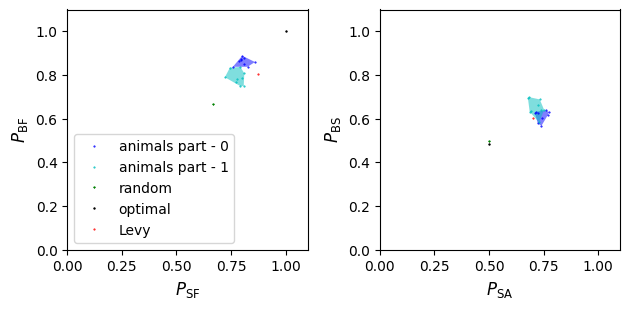

In [28]:
# unrewarded animals - exploration initial few bouts vs later

# plt.figure(figsize=(12, 6))
plt.figure()

colors = 'bcmyg'

k = 2
animal_tfs = unrew_animal_data.get_data_split_k(k)

sfs = []
bfs = []
sas = []
bss = []

labels = []
fmts = []
for i in range(k):
    phase_i_tfs = [sub[i] for sub in animal_tfs]
    bi_data, _ = em.get_decision_biases(phase_i_tfs, re=False)
    print("mean", np.mean(bi_data, axis=0))
    sfs.append(bi_data[:, 0])
    bfs.append(bi_data[:, 2])
    sas.append(bi_data[:, 1])
    bss.append(bi_data[:, 3])
    labels.append(f'animals part - {i}')
    fmts.append(f'{colors[i]}.')

sfs.append([2 / 3])
bfs.append([2 / 3])
sas.append([1 / 2])
bss.append([1 / 2])
labels.append('random')
fmts.append(f'g*')

bi_dfs, _ = em.get_decision_biases([dfs_agent_tf], re=True)
sfs.append(bi_dfs[:, 0])
bfs.append(bi_dfs[:, 2])
sas.append(bi_dfs[:, 1])
bss.append(bi_dfs[:, 3])
labels.append('optimal')
fmts.append(f'k+')

# agent
bi_agent, _ = em.get_decision_biases([agent_tf], re=False)
sfs.append(bi_agent[:, 0])
bfs.append(bi_agent[:, 2])
sas.append(bi_agent[:, 1])
bss.append(bi_agent[:, 3])
labels.append(agent_label)
fmts.append(f'r.')

# fmts = [f'b.', 'y.', 'g*', 'k+', 'r.'] # animal initially, animal later, random, dfs, agent

# plot biases BF vs SF
ax = plt.subplot(121)
mmp.plot(sfs, bfs, fmts=fmts, markersize=1,linewidth=1,
     xlim=[0, 1.1], ylim=[0, 1.1], equal=True, axes=ax,
     legend=labels,
     xlabel='$P_{\mathrm{SF}}$', ylabel='$P_{\mathrm{BF}}$', loc='lower left')

for i in range(len(sfs)-3):
    pts = np.array([sfs[i], bfs[i]]).T
    hull = ConvexHull(pts)
    plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],colors[i],alpha=0.5)

# plot biases BS vs SA
ax = plt.subplot(122)
mmp.plot(sas, bss, fmts=fmts, markersize=1,linewidth=1,
     xlim=[0, 1.1], ylim=[0, 1.1], equal=True, axes=ax,
     xlabel='$P_{\mathrm{SA}}$', ylabel='$P_{\mathrm{BS}}$', loc='lower left')

for i in range(len(sfs)-3):
    pts = np.array([sas[i], bss[i]]).T
    hull = ConvexHull(pts)
    plt.fill(pts[hull.vertices,0], pts[hull.vertices,1],colors[i],alpha=0.5)

# plt.suptitle(f"Decision biases")

So there indeed is a shift in turn biases over time. They start with very high forward biases. Probability of alternation seems to be constant. Going from deeper level to shallower level (P_BS) increases over time (from 0.5 (which is actually same as random) to 0.65). This is true for both rewarded and unrewarded animals.

# Visit Frequency

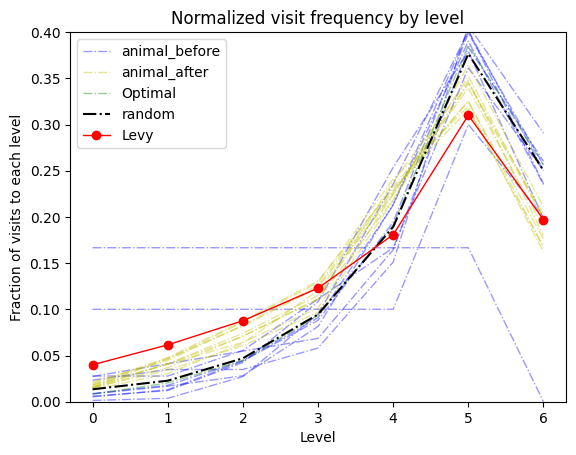

In [117]:
# rewarded animals - before and after reward

def get_explore_nodes(tf, re):
    cl = SplitModeClips(tf, ma, re=re)
    ce = cl[np.where(cl[:, 3] == p.EXPLORE)]  # clips of exploration
    ne = np.concatenate([tf.no[c[0]][c[1]:c[1] + c[2], 0] for c in ce])  # nodes excluding the last state in each clip
    return ne

plt.figure()

# animal data before
animal_tfs = animal_data.get_tf_before_first_reward()

ne = get_explore_nodes(animal_tfs[0], re=True)
visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
plt.plot(visit_frequency, 'b-.', alpha=0.4, linewidth=1, label='animal_before')
for tf in animal_tfs[1:]:  # plot rest of the animals
    ne = get_explore_nodes(tf, re)
    visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
    plt.plot(visit_frequency, 'b-.', alpha=0.4, linewidth=1)


# animal data after
animal_tfs = animal_data.get_tf_all_after_first_reward()

ne = get_explore_nodes(animal_tfs[0], re=True)
visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
plt.plot(visit_frequency, 'y-.', alpha=0.4, linewidth=1, label='animal_after')
for tf in animal_tfs[1:]:  # plot rest of the animals
    ne = get_explore_nodes(tf, re)
    visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
    plt.plot(visit_frequency, 'y-.', alpha=0.4, linewidth=1)

# dfs
ne = get_explore_nodes(dfs_agent_tf, re=False)
visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
plt.plot(visit_frequency, 'g-.', alpha=0.4, linewidth=1, label=dfs_agent_label)

# random
plt.plot([0.01344607, 0.02275074, 0.04698593, 0.09454197, 0.1892453, 0.37661891, 0.25032271], 'k-.', label='random')

# agent data
ne = get_explore_nodes(agent_tf, re=False)
visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
plt.plot(visit_frequency, 'r-o', linewidth=1, label=agent_label)


plt.title(f'Normalized visit frequency by level')
plt.xlabel('Level')
plt.ylabel(f"Fraction of visits to each level")
plt.legend(loc='upper left')
plt.ylim([0.0, 0.4])
plt.show()

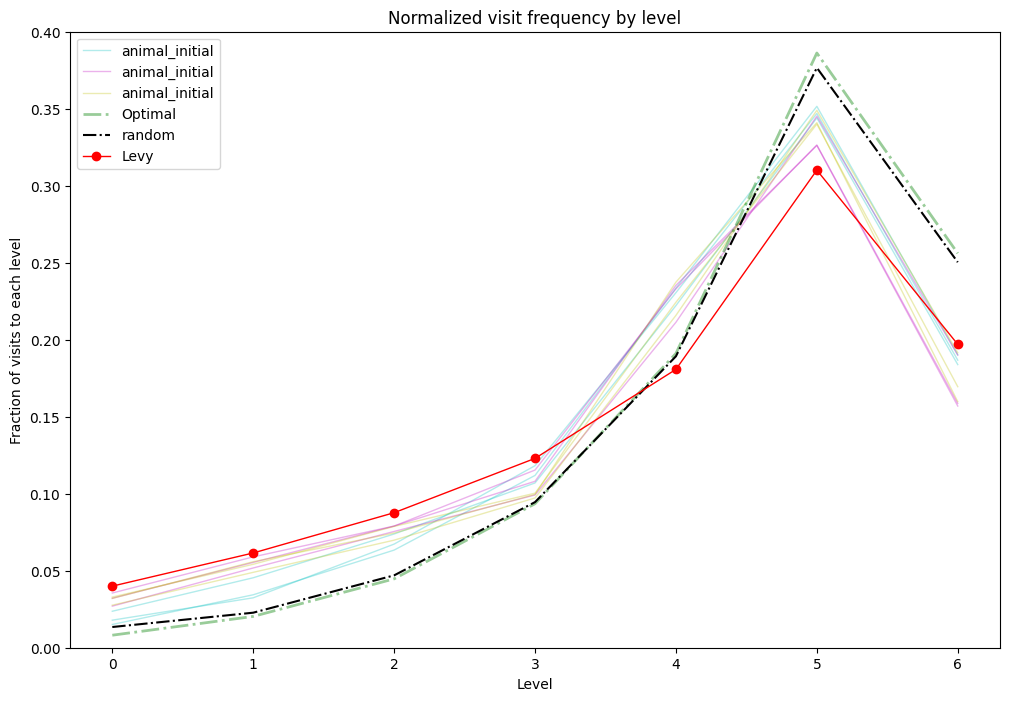

In [53]:
# unrewarded animals - initial few bouts and later

def get_explore_nodes(tf, re):
    cl = SplitModeClips(tf, ma, re=re)
    ce = cl[np.where(cl[:, 3] == p.EXPLORE)]  # clips of exploration
    ne = np.concatenate([tf.no[c[0]][c[1]:c[1] + c[2], 0] for c in ce])  # nodes excluding the last state in each clip
    return ne

plt.figure(figsize=(12, 8))


colors = 'cmy'

k = 3
animal_tfs = unrew_animal_data.get_data_split_k(k)

for i in range(k):
    phase_i_tfs = [sub[i] for sub in animal_tfs]
    ne = get_explore_nodes(phase_i_tfs[0], re=True)
    visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
    plt.plot(visit_frequency, f'{colors[i]}-', alpha=0.3, linewidth=1, label='animal_initial')
    for tf in phase_i_tfs[1:3]:  # plot rest of the animals
        ne = get_explore_nodes(tf, re)
        visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
        plt.plot(visit_frequency, f'{colors[i]}-', alpha=0.3, linewidth=1)

# dfs
ne = get_explore_nodes(dfs_agent_tf, re=False)
visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
plt.plot(visit_frequency, 'g-.', alpha=0.4, linewidth=2, label=dfs_agent_label)

# random
plt.plot([0.01344607, 0.02275074, 0.04698593, 0.09454197, 0.1892453, 0.37661891, 0.25032271], 'k-.', label='random')

# agent data
ne = get_explore_nodes(agent_tf, re=False)
visit_frequency = u.calculate_normalized_visit_frequency_by_level([ne])
plt.plot(visit_frequency, 'ro-', linewidth=1, label=agent_label)


plt.title(f'Normalized visit frequency by level')
plt.xlabel('Level')
plt.ylabel(f"Fraction of visits to each level")
plt.legend(loc='upper left')
plt.ylim([0.0, 0.4])
plt.show()

# OI Ratio

vi [ 2  2  6  4  2  4  5  8  7  3  7  7  2  2  9  7  5  4  4  4  1  1  4  4
 12  7  7 10  2  3  5  4  6  8  3  1  6  4  3  3  4  2  5  6  2  1  6  3
  0  0  0  0  0  0  0  0  2  0  3  2  0  1  1  3]
nu 229
Agent: Ratio of visits to outer vs inner leaf nodes = 0.812, with entropy = 5.513
vi [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
nu 0
Agent: Ratio of visits to outer vs inner leaf nodes = nan, with entropy = 0.000
vi [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
nu 2
Agent: Ratio of visits to outer vs inner leaf nodes = nan, with entropy = -0.000
vi [4 4 3 5 2 3 2 5 3 2 4 2 3 3 3 4 5 3 3 2 4 4 1 2 3 3 3 3 1 2 1 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 1]
nu 99
Agent: Ratio of visits to outer vs inner leaf nodes = 1.157, with entropy = 5.035
vi [0 0 0 0 0 0 0 0 1 2 6 3 2 4 3 4 0 0 0 0 0 0 0 0

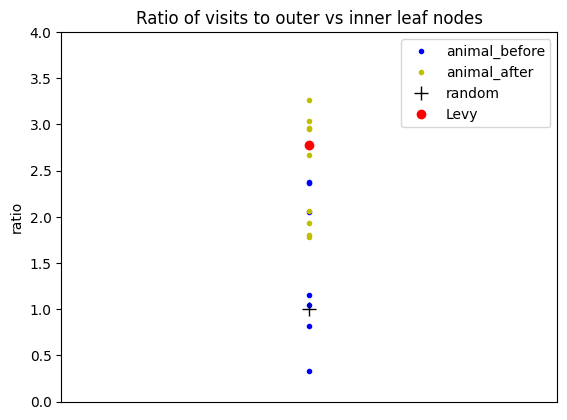

In [190]:
# rewarded animals - before and after first reward

# animal before
animal_tfs = animal_data.get_tf_before_first_reward()
ratios_initial = []
for tf in animal_tfs:
    try:
        ratios_initial.append(em.outside_inside_ratio(tf, re=True))
    except:
        print('failed')

# animal after
animal_tfs = animal_data.get_tf_all_after_first_reward()
ratios_later = []
for tf in animal_tfs:
    try:
        ratios_later.append(em.outside_inside_ratio(tf, re=True))
    except:
        print('failed')

# agent
agent_ratio = em.outside_inside_ratio(agent_tf, re=False)

plt.figure()

plt.plot([1]*len(ratios_initial), list(ratios_initial), 'b.', label=f'animal_before')
plt.plot([1]*len(ratios_later), list(ratios_later), 'y.', label=f'animal_after')
plt.plot([1], [1.0], 'k+', label='random', markersize=10)
plt.plot([1], [agent_ratio], 'ro', label=agent_label)

plt.ylim([0, 4])
plt.xlim([0, 2])
plt.title(f"Ratio of visits to outer vs inner leaf nodes")
plt.ylabel(f"ratio")
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.legend()
plt.show()

Agent: Ratio of visits to outer vs inner leaf nodes = 1.719, with entropy = 5.749
Agent: Ratio of visits to outer vs inner leaf nodes = 1.336, with entropy = 5.792
Agent: Ratio of visits to outer vs inner leaf nodes = 1.700, with entropy = 5.578
Agent: Ratio of visits to outer vs inner leaf nodes = 1.306, with entropy = 5.811
Agent: Ratio of visits to outer vs inner leaf nodes = 1.024, with entropy = 5.802
Agent: Ratio of visits to outer vs inner leaf nodes = 0.956, with entropy = 5.814
Agent: Ratio of visits to outer vs inner leaf nodes = 1.540, with entropy = 5.819
Agent: Ratio of visits to outer vs inner leaf nodes = 1.033, with entropy = 5.797
Agent: Ratio of visits to outer vs inner leaf nodes = 2.046, with entropy = 5.714
Agent: Ratio of visits to outer vs inner leaf nodes = 2.615, with entropy = 5.677
Agent: Ratio of visits to outer vs inner leaf nodes = 3.234, with entropy = 5.520
Agent: Ratio of visits to outer vs inner leaf nodes = 3.193, with entropy = 5.417
Agent: Ratio of 

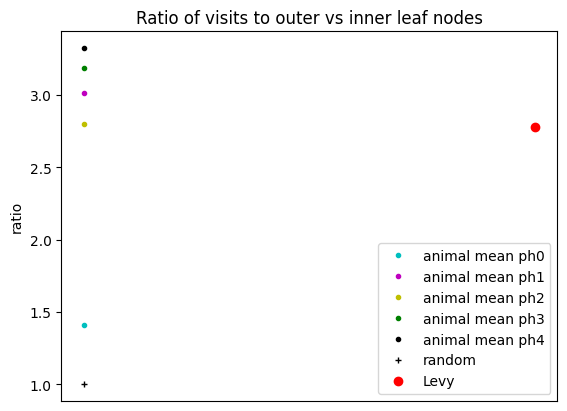

In [69]:
# unrewarded animals - initial and later

colors = 'cmygkrb'

plt.figure()

k = 5
animal_tfs = unrew_animal_data.get_data_split_k(k)

for i in range(k):
    phase_i_tfs = [sub[i] for sub in animal_tfs]
    ratios = [em.outside_inside_ratio(tf, re=False) for tf in phase_i_tfs]
#     plt.plot([1]*len(ratios), list(ratios), f'{colors[i]}.', label=f'animal {i}')
    plt.plot([1], np.mean(ratios), f'{colors[i%len(colors)]}.', label=f'animal mean ph{i}')

# agent
agent_ratio = em.outside_inside_ratio(agent_tf, re=False)


plt.plot([1], [1.0], 'k+', label='random', markersize=5)
plt.plot([2], [agent_ratio], 'ro', label=agent_label)

# plt.ylim([0, 4])
# plt.xlim([0, 2])
plt.title(f"Ratio of visits to outer vs inner leaf nodes")
plt.ylabel(f"ratio")
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.legend()
plt.show()

Again, a change in outgoing tendency later in the experiment compared to the beginning.

vi [ 29  12  31   8  16  18  10  12  31   5  31   8   4  13  14  20  24  11
  19   7  30  54   8  10  20   9  13  12   5  17  18  19  21  19  15   9
  18  26   7   7  45  13  39  15   6  10  31  12   7   2   6   1  70 155
   4  11  17   4  23   7  12  19  40  35]
nu 1244
Agent: Ratio of visits to outer vs inner leaf nodes = 2.183, with entropy = 5.473
vi [ 52  31  35  29  20  41  17  36  44  16  36  28  24  30  23  40  27  16
  22  10  42  55  18  14  20  13  31  16  17  36  16  28  29  23  21  12
  16  27   8  11  34  23  85  28  10  19  11  16   9   7   7   2 138 296
   9   7  53  33  40  16  35  42  25  54]
nu 2029
Agent: Ratio of visits to outer vs inner leaf nodes = 1.902, with entropy = 5.442
vi [39 13 29 29 13 15 10 10 23 20 52 27  4 10  5  8 13  8 10  3 25 48 10 16
  4  2  9  5  8 21  6 23 22 12 20 14 15 30  3  2 34 18 41 25 15  9  7  6
 11  3 10  7 31 79  8 12 16  4 24 11  9 17 12 46]
nu 1091
Agent: Ratio of visits to outer vs inner leaf nodes = 2.899, with entropy = 5.593
vi 

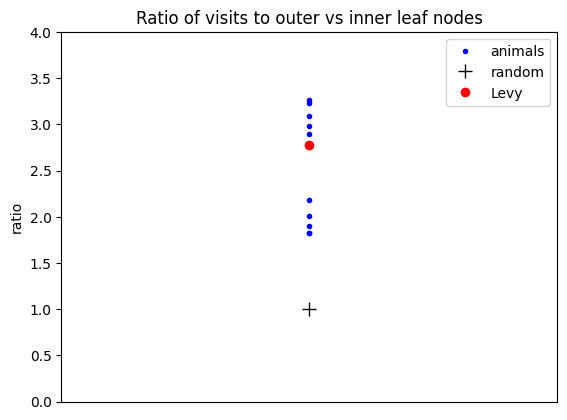

In [202]:
# rewarded animals - all

# animals
animal_tfs = animal_data.get_data_all(re=True)

ratios = [em.outside_inside_ratio(tf, re=True) for tf in animal_tfs]

# agent
agent_ratio = em.outside_inside_ratio(agent_tf, re=False)

plt.figure()

plt.plot([1]*len(ratios), list(ratios), 'b.', label=f'animals')
plt.plot([1], [1.0], 'k+', label='random', markersize=10)
plt.plot([1], [agent_ratio], 'ro', label=agent_label)

plt.ylim([0, 4])
plt.xlim([0, 2])
plt.title(f"Ratio of visits to outer vs inner leaf nodes")
plt.ylabel(f"ratio")
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.legend()
plt.show()